In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


### **Blinket dataset**

In [2]:
df = pd.read_csv("blinkit_data.csv")

In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Size of data**

In [15]:
df.shape

(8523, 12)

In [4]:
print("Size of the data:",df.shape)

Size of the data: (8523, 12)


In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [7]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
df['Item Fat Content'] = df['Item Fat Content'] . replace({'LF':'Low Fat',
                                                           'low fat':'Low Fat','reg':'Regular'})

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **BUSINESS REQUIREMENTS**

### **KPI'S REQUIREMENTS**

In [10]:
#Total Sales
Total_Sales = df['Sales'].sum()

#Average sales
avg_Sales = df['Sales'].mean()

#Number of item sold 
no_of_item_sold = df['Sales'].count()

# Avg of Rating
avg_rating =df['Rating'].mean()

#Display

print(f"Total Sales :${Total_Sales:,.0f}")
print(f"Average Sales :${avg_Sales:,.1f}")
print(f"Number of item sold  :{no_of_item_sold:,.0f}")
print(f"Average of Rating :{avg_rating:,.1f}")


Total Sales :$1,201,681
Average Sales :$141.0
Number of item sold  :8,523
Average of Rating :4.0


### **CHARTS REQUIREMENTS**

#### **Total Sales by fat Contens**

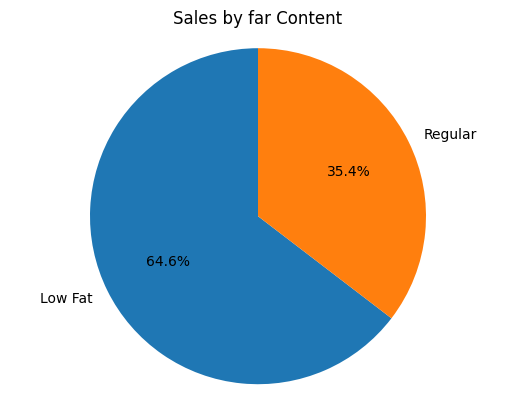

In [11]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct = '%.1f%%',
        startangle = 90)
plt.title('Sales by far Content')
plt.axis('equal')
plt.show()

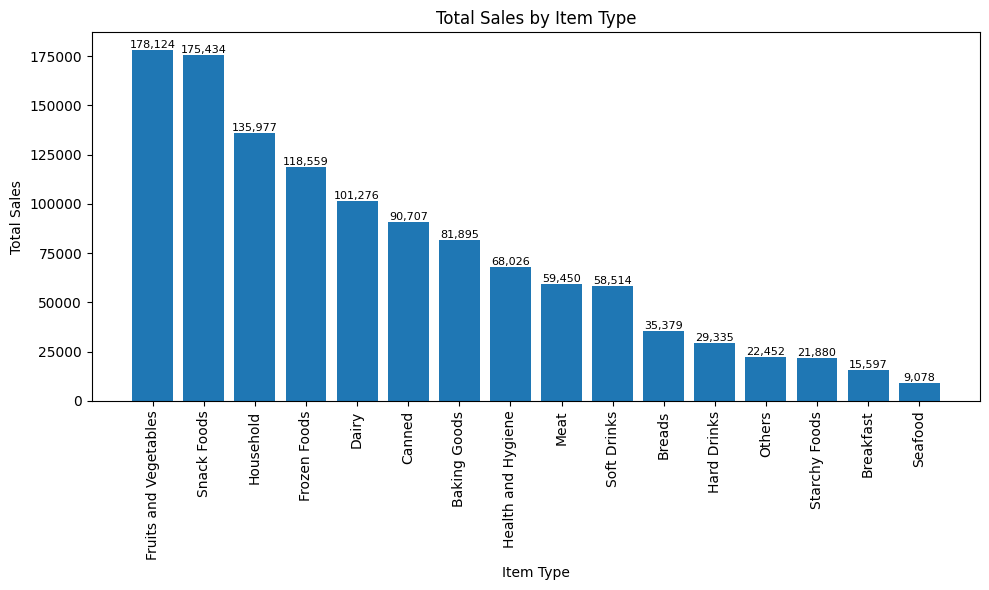

In [12]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # ✅ Correct method to set figure size

bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',              # ✅ Correct spelling
        fontsize=8                # ✅ Use fontsize instead of fontdict
    )

plt.tight_layout()
plt.show()

    

### **Fat content by Outlet for Total Sales**

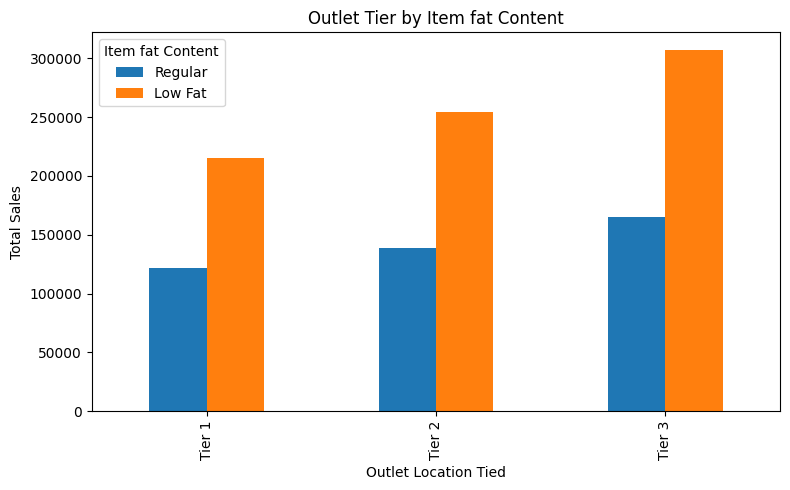

In [13]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar',figsize=(8,5),title='Outlet Tier by Item fat Content')
plt.xlabel('Outlet Location Tied')
plt.ylabel('Total Sales')
plt.legend(title = 'Item fat Content' )
plt.tight_layout()
plt.show()

#### **Total Sales By Outlet Establishment**

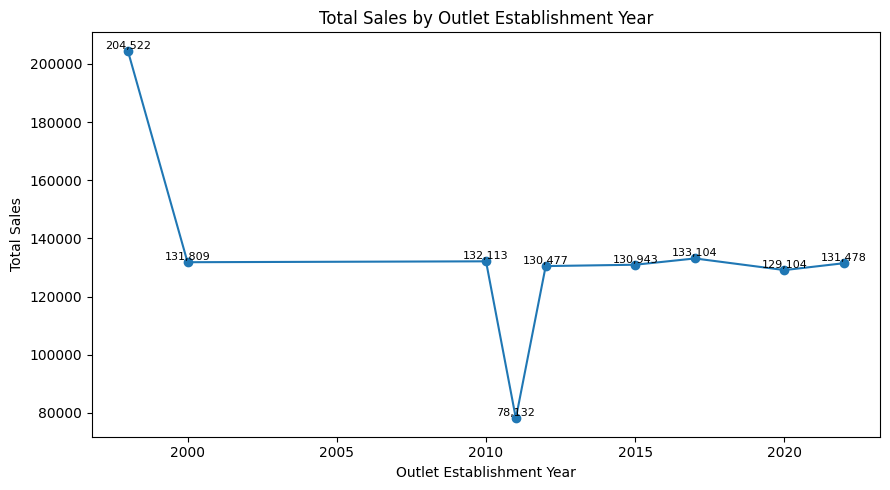

In [19]:
sales_by_year = df.groupby('Outlet Establishment Year') ['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **Sales By Outlet size**

#### **Total Sales By Outlet Establishment**

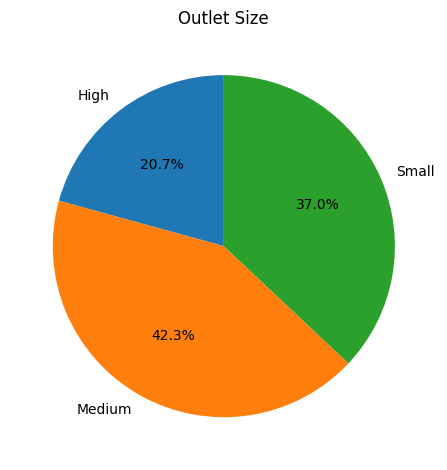

In [36]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.Figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### **Sales By Outlet Location**

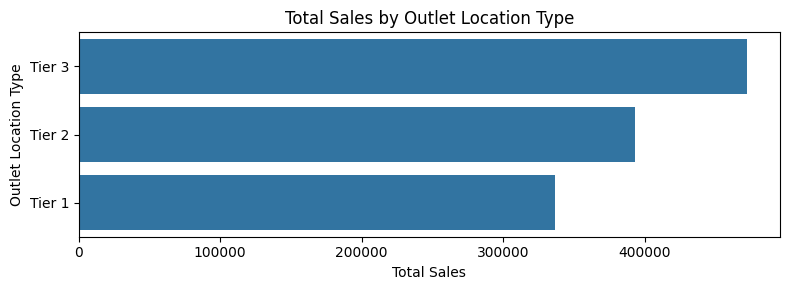

In [52]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

# Plot
plt.figure(figsize=(8, 3))  # lowercase 'f' in figure
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)  # fixed 'data'

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()

### **End nof the project **